## Data Science Academy Classification Hackathon 

### Let's do some importing 

In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
import string
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


### Let's do some data loading

In [2]:

data = pd.read_csv(r"C:\Users\manyi\Downloads\sample_submission.csv")
train = pd.read_csv(r"C:\Users\manyi\Downloads\train_set.csv\train_set.csv")
test = pd.read_csv(r"C:\Users\manyi\Downloads\test_set.csv")


### Exploring the data a little

C:\Users\manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang_id', ylabel='count'>

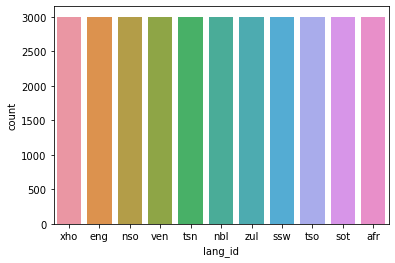

In [3]:
sns.countplot(train.lang_id)

In [4]:
train.info

<bound method DataFrame.info of       lang_id                                               text
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2         eng  the province of kwazulu-natal department of tr...
3         nso  o netefatša gore o ba file dilo ka moka tše le...
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
...       ...                                                ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
32997     eng  closing date for the submission of completed t...
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...

[33000 rows x 2 columns]>

In [5]:
train.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [6]:
#tokenizing the tweets
tokeniser = TreebankWordTokenizer()
train['tokenized'] = train['text'].apply(tokeniser.tokenize)

In [7]:
train.head()

lang_id                                               text  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...   
2     eng  the province of kwazulu-natal department of tr...   
3     nso  o netefatša gore o ba file dilo ka moka tše le...   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...   

                                           tokenized  
0  [umgaqo-siseko, wenza, amalungiselelo, kumazik...  
1  [i-dha, iya, kuba, nobulumko, bokubeka, umsebe...  
2  [the, province, of, kwazulu-natal, department,...  
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...  
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...

### Exploring the models

In [8]:
#Splitting features and target variables
X = train['text']
y = train['lang_id'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [9]:
tfidf = TfidfVectorizer() #Call the TFidfVectorizer
cf= CountVectorizer() #Call the CountVectorizer

In [10]:
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=1000)
clf_lr = Pipeline([('tfidf', tfidf), ('clf', lr)]) #Create a pipeline
clf_lr.fit(X_train, y_train) #Fit the training data to the pipeline
y_pred_lr= clf_lr.predict(X_test)#Make predictions
print('accuracy %s' % accuracy_score(y_pred_lr, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_lr,average='weighted')) #Print the weighted f1 score
print(classification_report(y_test, y_pred_lr)) #Classification

accuracy 0.9937878787878788
f1_score 0.9937875535289843
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       574
         eng       1.00      1.00      1.00       609
         nbl       1.00      0.98      0.99       568
         nso       1.00      1.00      1.00       575
         sot       1.00      1.00      1.00       566
         ssw       0.99      0.99      0.99       643
         tsn       0.99      1.00      1.00       587
         tso       1.00      1.00      1.00       615
         ven       1.00      1.00      1.00       624
         xho       0.98      1.00      0.99       605
         zul       0.98      0.98      0.98       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [11]:
nb = MultinomialNB()
clf_nb= Pipeline([('tfidf', tfidf), ('clf', nb)])
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 0.9981818181818182
f1_score 0.9981827936101162
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       574
         eng       0.99      1.00      0.99       609
         nbl       1.00      1.00      1.00       568
         nso       1.00      1.00      1.00       575
         sot       1.00      1.00      1.00       566
         ssw       1.00      1.00      1.00       643
         tsn       1.00      1.00      1.00       587
         tso       1.00      1.00      1.00       615
         ven       1.00      1.00      1.00       624
         xho       1.00      1.00      1.00       605
         zul       1.00      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Hyperparameter Tuning

In [12]:
paramgrid = { 'alpha': [0.01, 0.1, 1]}
multi = Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1,3), min_df=2)),
                 ('clf', GridSearchCV(MultinomialNB(),
                                     param_grid=paramgrid,
                                     cv=10,
                                     n_jobs= -1))])
multi.fit(X_train, y_train)
y_pred = multi.predict(X_test)
print(classification_report(y_test, y_pred),2)
multi_nb = classification_report(y_test, y_pred, output_dict= True)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       574
         eng       0.99      1.00      1.00       609
         nbl       1.00      0.99      1.00       568
         nso       1.00      1.00      1.00       575
         sot       1.00      1.00      1.00       566
         ssw       1.00      1.00      1.00       643
         tsn       1.00      1.00      1.00       587
         tso       1.00      1.00      1.00       615
         ven       1.00      1.00      1.00       624
         xho       1.00      1.00      1.00       605
         zul       1.00      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600
 2


In [13]:
param_grid = {'alpha':[0.01,0.1,1]}
NB = Pipeline([('NB_tfidf', TfidfVectorizer(min_df=1,max_df=0.5,ngram_range=(6,6),analyzer='char')),
               ('NB_clf', GridSearchCV(MultinomialNB(),param_grid=param_grid,cv=5,n_jobs=-1))])

In [14]:
# Make Submission
My_submission = pd.DataFrame(test['index'])
My_submission['lang_id'] = multi.predict(test['text'])
My_submission.to_csv('Nomfundo_Manyisa_Classification_Hack',index=False)